# Task 6.3 Geographic Visualization of "Gun violence" in the U.S

## This Script contains the following:

### 1. Importing libraries and Data
### 2. Wrangling of Data
### 3. Cleaning of Data
### 4. Plotting a Choropleth
### 5. Discussing results 
### 6. Exploring leads to new research questions based on results

## Importing libraries and data

In [208]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json

In [141]:
# The following command prompts matplotlib visuals to appear in the notebook

%matplotlib inline

In [142]:
# Importing ".json" file for the U.S.

country_geo = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6\us-states.json'

In [143]:
# Checking JSON file content

f = open(r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6\us-states.json',)

# returns JSON object as a dictionary

data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [290]:
# Creating path

path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6'

In [291]:
# Importing the Project's data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Gun_violence_Data_cleaned.csv'))

In [292]:
pd.set_option('display.max_columns', None)

In [293]:
df.head()

incident_id        date           state city_or_county  \
0       461105  01/01/2013    Pennsylvania     Mckeesport   
1       460726  01/01/2013      California      Hawthorne   
2       478855  01/01/2013            Ohio         Lorain   
3       478925  05/01/2013        Colorado         Aurora   
4       478959  07/01/2013  North Carolina     Greensboro   

                                     address  number_killed  number_injured  \
0  1506 Versailles Avenue and Coursin Street              0               4   
1               13500 block of Cerise Avenue              1               3   
2                      1776 East 28th Street              1               3   
3           16000 block of East Ithaca Place              4               0   
4                  307 Mourning Dove Terrace              2               2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  congressional_district             gun_stolen  \
0                        False                    14.0                    NaN   
1                        False                    43.0                    NaN   
2                        False                     9.0  0, Unknown|1, Unknown   
3                        False                     6.0                    NaN   
4                        False                     6.0  0, Unknown|1, Unknown   

                gun_type                           incident_characteristics  \
0                    NaN  Shot - Wounded/Injured|Mass Shooting (4+ victi...   
1                    NaN  Shot - Wounded/Injured|Shot - Dead (murder, ac...   
2  0, Unknown|1, Unknown  Shot - Wounded/Injured|Shot - Dead (murder, ac...   
3                    NaN  Shot - Dead (murder, accidental, suicide)|Offi...   
4  0, Handgun|1, Handgun  Shot - Wounded/Injured|Shot - Dead (murder, ac...   

   latitude location_description  longitude  number_guns_involved  \
0   40.3467                  NaN   -79.8559                   NaN   
1   33.9090                  NaN  -118.3330                   NaN   
2   41.4455          Cotton Club   -82.1377                   2.0   
3   39.6518                  NaN  -104.8020                   NaN   
4   36.1140                  NaN   -79.9569                   2.0   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1  Four Shot; One Killed; Unidentified shooter in...   
2                                                NaN   
3                                                NaN   
4  Two firearms recovered. (Attempted) murder sui...   

                 participant_age  \
0                          0, 20   
1                          0, 20   
2  0, 25|1, 31|2, 33|3, 34|4, 33   
3        0, 29|1, 33|2, 56|3, 33   
4        0, 18|1, 46|2, 14|3, 47   

                               participant_age_group  \
0  0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...   
1  0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...   
2  0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...   
3  0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...   
4  0, Adult 18+|1, Adult 18+|2, Teen 12-17|3, Adu...   

                        participant_gender  \
0        0, Male|1, Male|3, Male|4, Female   
1                                  0, Male   
2  0, Male|1, Male|2, Male|3, Male|4, Male   
3        0, Female|1, Male|2, Male|

In [148]:
df.shape

(239677, 27)

## Data Wrangling

In [150]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'number_killed', 'number_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'number_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district'],
      dtype='object')

In [151]:
# Selecting only the necessary columns and putting them in a list called columns

columns = ["date",
           "state",
           "city_or_county",
           "number_killed",
           "number_injured",
           "longitude",
           "latitude"
          ]

In [152]:
# Creating a subset

df_sub = df[columns]

In [153]:
df_sub.head()

date           state city_or_county  number_killed  number_injured  \
0  01/01/2013    Pennsylvania     Mckeesport              0               4   
1  01/01/2013      California      Hawthorne              1               3   
2  01/01/2013            Ohio         Lorain              1               3   
3  05/01/2013        Colorado         Aurora              4               0   
4  07/01/2013  North Carolina     Greensboro              2               2   

   longitude  latitude  
0   -79.8559   40.3467  
1  -118.3330   33.9090  
2   -82.1377   41.4455  
3  -104.8020   39.6518  
4   -79.9569   36.1140

In [154]:
df_sub.shape

(239677, 7)

In [155]:
# Dropping unnecessary columns from the dataframe

df_sub.drop(columns = ["longitude", "latitude"], inplace=True)

C:\Users\terry\AppData\Local\Temp\ipykernel_8140\1924952083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(columns = ["longitude", "latitude"], inplace=True)


In [156]:
df_sub.columns

Index(['date', 'state', 'city_or_county', 'number_killed', 'number_injured'], dtype='object')

In [157]:
df_sub.head()

date           state city_or_county  number_killed  number_injured
0  01/01/2013    Pennsylvania     Mckeesport              0               4
1  01/01/2013      California      Hawthorne              1               3
2  01/01/2013            Ohio         Lorain              1               3
3  05/01/2013        Colorado         Aurora              4               0
4  07/01/2013  North Carolina     Greensboro              2               2

In [158]:
type(df_sub)

pandas.core.frame.DataFrame

In [159]:
# Making sure names of geographical objects in both the Dataframe "df_sub" and the JSON need to match

df_sub['state'] = df_sub['state'].str.title()

C:\Users\terry\AppData\Local\Temp\ipykernel_8140\3495939591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['state'] = df_sub['state'].str.title()


In [160]:
df_sub.head()

date           state city_or_county  number_killed  number_injured
0  01/01/2013    Pennsylvania     Mckeesport              0               4
1  01/01/2013      California      Hawthorne              1               3
2  01/01/2013            Ohio         Lorain              1               3
3  05/01/2013        Colorado         Aurora              4               0
4  07/01/2013  North Carolina     Greensboro              2               2

## 3. Consistency Checks

#### Checking missing values

In [161]:
df_sub.isnull().sum()

# Subset contains no missing values

date              0
state             0
city_or_county    0
number_killed     0
number_injured    0
dtype: int64

#### Checking Duplicates

In [162]:
dups = df_sub.duplicated()

In [163]:
dups.shape # No duplicates

(239677,)

#### Extreme Values checks

In [164]:
sns.histplot(df_sub['number_killed'], bins=20, kde = True) # shows extreme values for number of deaths per incident

<Axes: xlabel='number_killed', ylabel='Count'>

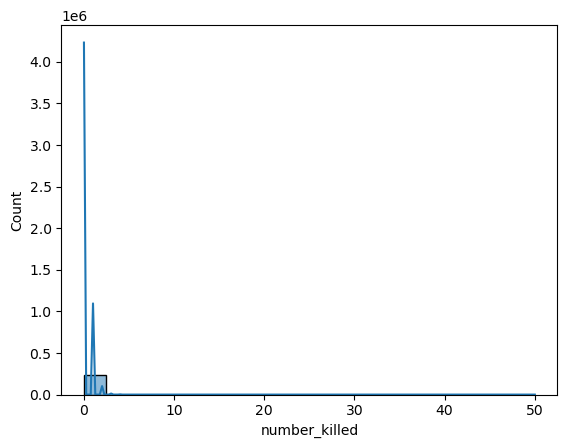

In [165]:
plt.show()

In [166]:
# checking how many extreme values
# No extreme values in terms of casualties per incident

df_sub[df_sub['number_killed'] > 50]

Empty DataFrame
Columns: [date, state, city_or_county, number_killed, number_injured]
Index: []

In [167]:
sns.histplot(df_sub['number_injured'], bins=20, kde = True) # shows extreme values for number of injured per incident

<Axes: xlabel='number_injured', ylabel='Count'>

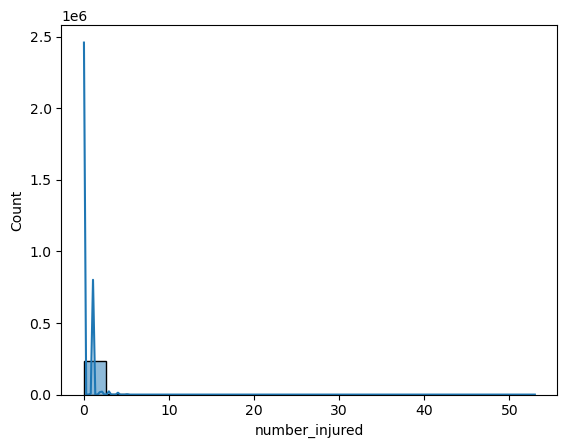

In [168]:
plt.show()

In [286]:
# checking how many extreme values
# No extreme values in terms of injured victims per incident

df_sub[df_sub['number_injured'] > 100]

Empty DataFrame
Columns: [date, state, city_or_county, number_killed, number_injured]
Index: []

In [287]:
# Selecting only entries with non zero injuries or deaths

df_sub = df_sub[df_sub['number_killed'and 'number_injured'] >= 1]

In [288]:
df_sub.dtypes

date              object
state             object
city_or_county    object
number_killed      int64
number_injured     int64
dtype: object

### Plotting a Choropleth

In [294]:
# Aggregating the number_killed per state
state_data = df.groupby("state")["number_killed"].sum().reset_index()

In [295]:
# Checking state_data

state_data.head()

state  number_killed
0     Alabama           1880
1      Alaska            267
2     Arizona           1094
3    Arkansas            773
4  California           5562

In [296]:
# Sorting number of killed victims in descending order by state

state_data = pd.DataFrame(state_data)
state_data_sorted = state_data.sort_values(by='number_killed', ascending=False)
state_data_sorted.reset_index(drop=True, inplace=True)
state_data_sorted

state  number_killed
0             California           5562
1                  Texas           5046
2                Florida           3909
3               Illinois           3409
4                   Ohio           2508
5                Georgia           2456
6           Pennsylvania           2395
7         North Carolina           2225
8              Louisiana           2179
9               Missouri           2136
10               Alabama           1880
11             Tennessee           1824
12              New York           1705
13              Maryland           1691
14        South Carolina           1610
15               Indiana           1608
16              Michigan           1588
17              Virginia           1459
18           Mississippi           1176
19            New Jersey           1168
20               Arizona           1094
21              Kentucky           1066
22              Oklahoma            941
23             Wisconsin            862
24            Washington            853
25                Nevada            799
26              Colorado            796
27              Arkansas            773
28                Kansas            542
29            New Mexico            495
30         Massachusetts            472
31             Minnesota            461
32  District of Columbia            459
33                Oregon            446
34           Connecticut            341
35         West Virginia            335
36                  Utah            282
37                  Iowa            273
38                Alaska            267
39              Nebraska            225
40              Delaware            217
41                 Idaho            166
42               Montana            154
43                 Maine            112
44          South Dakota             90
45         New Hampshire             88
46               Wyoming             73
47          North Dakota             69
48          Rhode Island             63
49                Hawaii             63
50               Vermont             57

In [297]:
# Creating a folium map centered on the U.S

m = folium.Map(location=[37.8, -98], zoom_start=4)

In [298]:
# Adding the choropleth Layer

folium.Choropleth(
    geo_data=country_geo,
    name="choropleth",
    data=state_data,
    columns=["state", "number_killed"],
    key_on="feature.properties.name", # Checks json file to see where the KEY is located - very important
    fill_color="YlOrBr",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Gun Violence Deaths per state",
).add_to(m)

# adding hover tooltip

folium.GeoJson(
    country_geo,
    style_function=lambda feature:{
        'fillColor':'transparent',
        'color':'black',
        'weight':0.5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],  # this has to match the property name in GeoJSON
        aliases=["state: "],
        localize=True,
        sticky=False,
        labels=True,
        style="background-color: white; color: black; font-size: 12px; padding: 5px;",
    )
).add_to(m)
# Add Layer Control
folium.LayerControl().add_to(m)

# Save the map

m.save("gun_violence_map.html")

m

In [259]:
# Aggregating the number_injured per state
state_data2 = df.groupby("state")["number_injured"].sum().reset_index()

In [267]:
# Checking state_data2

state_data2.head()

state  number_injured
0     Alabama            2998
1      Alaska             325
2     Arizona            1096
3    Arkansas            1347
4  California            7644

In [281]:
# Sorting number of injured victims in descending order

state_data2 = pd.DataFrame(state_data2)
state_data2_sorted = state_data2.sort_values(by='number_injured', ascending=False)
state_data2_sorted.reset_index(drop=True, inplace=True)

state_data2_sorted

state  number_injured
0               Illinois           13514
1             California            7644
2                Florida            7072
3                  Texas            6106
4                   Ohio            5703
5               New York            5059
6           Pennsylvania            5056
7         North Carolina            4629
8              Tennessee            4478
9              Louisiana            4398
10               Georgia            4056
11              Missouri            3585
12              Virginia            3566
13              Maryland            3167
14        South Carolina            3084
15               Alabama            2998
16              Michigan            2990
17               Indiana            2956
18            New Jersey            2540
19             Wisconsin            2117
20              Kentucky            1894
21           Mississippi            1883
22         Massachusetts            1701
23              Oklahoma            1550
24  District of Columbia            1415
25              Arkansas            1347
26            Washington            1287
27           Connecticut            1258
28              Colorado            1133
29               Arizona            1096
30                Nevada             951
31                Kansas             931
32             Minnesota             916
33              Delaware             853
34                  Iowa             821
35                Oregon             694
36              Nebraska             674
37         West Virginia             649
38            New Mexico             543
39                  Utah             402
40          Rhode Island             346
41                Alaska             325
42                 Idaho             149
43         New Hampshire             144
44               Montana             136
45                 Maine             132
46          North Dakota             130
47          South Dakota             114
48                Hawaii              85
49               Vermont              73
50               Wyoming              52

In [299]:
# Creating a folium map centered on the U.S

m = folium.Map(location=[37.8, -98], zoom_start=4)

# Adding the choropleth Layer

folium.Choropleth(
    geo_data=country_geo,
    name="choropleth",
    data=state_data2,
    columns=["state", "number_injured"],
    key_on="feature.properties.name",
    fill_color="YlOrBr",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Gun Violence Injuries per state",
).add_to(m)

# adding hover tooltip

folium.GeoJson(
    country_geo,
    style_function=lambda feature:{
        'fillColor':'transparent',
        'color':'black',
        'weight':0.5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],  # this has to match the property name in GeoJSON
        aliases=["state: "],
        localize=True,
        sticky=False,
        labels=True,
        style="background-color: white; color: black; font-size: 12px; padding: 5px;",
    )
).add_to(m)
# Add Layer Control
folium.LayerControl().add_to(m)

# Save the map

m.save("gun_violence_map.html")

m

### Discussing results

According to the results in finding out which state has the highest casualty count by death and injury using the Choropleth map, California and Illinois respectively stand out as the top states. 

#### 1. Number of deaths by states: 
Over a period of 5 years (from 2013 to 2018), California: 5562 , Texas: 5046, Florida: 3909, Illinois: 3409 and Ohio: 2508 witnessed the highest gun violence casualties totalling 20,434 Deaths. Please note: The darker the color on the map, the more victim-count there is in the state.

#### 2. Number of injured victims by state:
For the same period of time (2013 to 2018), the following states registered the highest gun related injuries: Illinois: 13514, California: 7644, Florida: 7072, Texas: 6106, Ohio: 5703. The darker the color on the map, the more victims the corresponding state has experienced. 

### New research question leads based on results

1. It will be interesting to find out which states registered the most deaths by year and even quarterly.
2. Using the population data from a reliable source, i will like to find out which state had the highest gun violence casualties per capita (for example: How many victims per 100 000 people) for the 5 years the analysis is being conducted.
3. I will also like to compare casualty-rates in states with open carry policy and background checks laws during that period - Getting information regarding such laws and when which state implemented them shouldn't pose any issue on its reliability.
4. I would also like to compare if any socio-economic factors like employment rates, education and income level played any significant role in states with more gun violence. Data on those factors should be readily available publicly
5. Did race play any role in the crime rate in states or cities. What is the proportion of crime among the different races relative to their economic situation.